# Title

us

# Abstract

In this lab we used the photoelectric effect to calculate Planck's Constant. We calculated Planck's Constant to be 2.950x10^-34 with 55% error.

# Introduction

The photoelectric effect occurs when light is shined on a metal surface, electrons may be ejected from the surface of the metal. Following the wave theory of light, the kinetic energy of emitted photoelectrons would be proportional to the light intensity. However, Philip Lenard discovered that the maximum kinetic energy of photoelectrons did not depend on the intensity of the light amplitude. In 1905, Albert Einstein published “A Heuristic Point of View About the Generation and Transformation of Light.” Besides creating the theory of light quanta, Einstein explained the photoelectric effect and that light is composed of quanta of energy called photons, each containing energy equivalent to hf.

From the relationship between the stopping potential and the reciprocal of the wavelength, we have determined the value of Planck’s constant from the slope of this function. 

# Procedure

<p>
We setup our mercury arc lamp about 10 cm away from the photoelectric effect apparatus. We began with using the blue filter. Doing three trial each, we start with the lamp off and we would zero the photoelectric effect apparatus. Then we would turn on the lamp and watch the needle move. It was hard to tell when exactly the needle hit zero so we would alternate between covering the photoelectric effect apparatus and uncovering it. This made it easier to tell if we were at zero because we only had to check if the needle moved. If it did, we increased the voltage and checked again. If the needle didn't move, we covered up the apparatus and lowered the voltage slightly before checking again. This made it easier to figure out the exact moment we hit the stopping voltage.
</p>
<p> 
When we switched to the green filter, the output current was too low to notice any real changes. Instead of trying to work with uncertain data, we switch to the Stefan Boltzmann lamp. The lamp was much brighter and it allowed us to more easily see changes in the current. We continued with the process outlined in the previous paragraph for bother the green and red filters.
</p>

# Data and Calculations

In [1]:
bluefilter = [
    .904, .964, .611,
    .923, .927, .896,
    .677, .744, .857
]

greenfilter = [
    .548, .478, .505,
    .528, .491, .474,
    .493, .548, .583
]

redfilter = [
    .435, .442, .441,
    .412, .399, .443,
    .391, .434, .421
]

avgV_blue = (.904 + .964 + .611 + .923 + .927 + .896 + .677 + .744 + .857)/9
avgV_green = (.548 + .478 + .505 + .528 + .491 + .474 + .493 + .548 + .583)/9
avgV_red = (.435 + .442 + .441 + .412 + .399 + .443 + .391 + .434 + .421)/9

print(avgV_blue, "V - Average value for stopping voltage for blue filter")
print(avgV_green, "V - Average value for stopping voltage for green filter")
print(avgV_red, "V - Average value for stopping voltage for red filter")

0.8336666666666668 V - Average value for stopping voltage for blue filter
0.5164444444444444 V - Average value for stopping voltage for green filter
0.4242222222222222 V - Average value for stopping voltage for red filter


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from scipy.optimize import curve_fit
%matplotlib inline

global C
global e
global H
global WL_RED
global WL_GREEN 
global WL_BLUE

C = 2.998e8
e = 1.602e-19
H = 6.626e-34
WL_RED = 590e-9
WL_GREEN = 546e-9
WL_BLUE = 436e-9

E_red = (H*C)/WL_RED * 1/e
E_green = (H*C)/WL_GREEN * 1/e
E_blue = (H*C)/WL_BLUE * 1/e

print(E_red, "eV - Energy of red filter")
print(E_green, "eV - Energy of green filter")
print(E_blue, "eV - Energy of blue filter")

2.101689413656658 eV - Energy of red filter
2.2710563261125056 eV - Energy of green filter
2.844029252425294 eV - Energy of blue filter


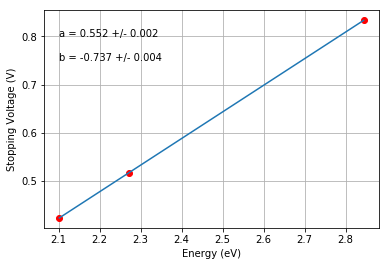

2.9501266119 - Experimental value for h
55.4765075173 - Percent Error for h


In [11]:
xdata = [E_red,E_green,E_blue]
#xdata = [1/WL_RED,1/WL_GREEN,1/WL_BLUE]
ydata = [avgV_red,avgV_green,avgV_blue]

def func(x, a, b):
    return a*x + b

popt, pcov = curve_fit(func, xdata, ydata)

plt.plot(xdata, ydata, 'ro')
plt.xlabel("Energy (eV)")
plt.ylabel("Stopping Voltage (V)")
plt.plot(xdata, np.polyval(popt, xdata), '-')
plt.text(2.1, 0.8, r"a = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
plt.text(2.1, 0.75, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
plt.grid()
plt.show()

a = popt[0]
h = a*(1.602*10/2.998)
percent_error = (abs(h - 6.626)/6.626) * 100

print(h, "- Experimental value for h")
print(percent_error, "- Percent Error for h")

# Conclusion

In this experiment, we had three different filters placed in front of the photodiode and recorded the stopping voltage of each filter nine times. Then, we took the average stopping voltage of each filter. Converting the stopping voltage to energy allowed us to create a graph comparing energy and the stopping voltage. The slope of the function allowed us to determine the value of Planck's constant. The theoretical value of Planck’s constant was 6.626 X 10^-34 Js. Our measured value of Planck’s constant was determined to be 2.950 X 10^-34. The percent error in our measured value was calculated to be 55.48%. Due to the magnitude of the percent error, this experimental outcome can be deemed unsuccessful. To have more accurate results, perhaps the amplifier should have been placed closer to the photodiode. Though, if the amplifier and the photodiode were too close, too much radiation would have came through and the stopping voltage would have been too high. 

# References

Serway, R. A., Moses, C. J., & Moyer, C. A. (2004). Modern Physics (3rd ed.). Belmont, CA: Brooks/Cole. 

Photoelectric effect. Retrieved October 11, 2017, from
https://www.khanacademy.org/science/physics/quantumphysics/photons/a/photoelectric-effect 